In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
df = df.drop('Unnamed: 0', axis = 1)

In [13]:
df.shape

(1000, 11)

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
X

array([[0.91391733, 1.16207271, 0.56794585, ..., 0.64379756, 0.87942209,
        1.23140944],
       [0.6356319 , 1.00372163, 0.53534235, ..., 1.01354599, 0.62155222,
        1.4927016 ],
       [0.72135981, 1.20149262, 0.92198973, ..., 1.15448315, 0.95787702,
        1.28559679],
       ...,
       [1.13546983, 0.98246233, 0.78190516, ..., 0.38958442, 0.91919143,
        1.385504  ],
       [1.08489449, 0.86176917, 0.40715771, ..., 1.06133794, 1.27745578,
        1.18806277],
       [0.83745954, 0.96118352, 0.41700599, ..., 0.90796187, 1.25718998,
        1.36483726]])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test, y_pred))

[[158  11]
 [  7 124]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       169
           1       0.92      0.95      0.93       131

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# Choosing The K values

In [30]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

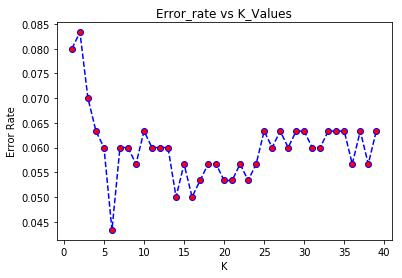

In [33]:
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.title('Error_rate vs K_Values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### From The Above Graph We Can Say That We Can Get The Optimum Accuracy at 6.

#### Now Lets Compare the accuracy and the error rate based on k values

In [42]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
pred_1 = knn_1.predict(X_test)
print(classification_report(y_test, pred_1))
print("Confusion Matrix on k=1: \n",confusion_matrix(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       169
           1       0.89      0.93      0.91       131

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix on k=1: 
 [[154  15]
 [  9 122]]


In [43]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
pred_6 = knn_6.predict(X_test)
print(classification_report(y_test, pred_6))
print("Confusion Matrix on k=6: \n", confusion_matrix(y_test, pred_6))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       169
           1       0.95      0.95      0.95       131

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix on k=6: 
 [[163   6]
 [  7 124]]


# Now From the above model comparision we can say that with the value of k = 6 we can get the maximum accuracy.

In [44]:
import pickle

In [45]:
pickle.dump(knn_6, open('classifier.sav', 'wb'))

In [46]:
loaded_model = pickle.load(open('classifier.sav', 'rb'))
loaded_model.score(X_test, y_test)

0.9566666666666667